![](https://algo-assets.amplifyme.com/quant/challenge1.png)

# Quant Simulation Challenge 1 - Non-skewed Price Making

Your first challenge is to work independently to follow the instructor to complete the challenges below. This will help give you the foundations for the future challenges.

The goal of this challenge is to automate the market-making process, using object-orientated programming to automatically create a bid-offer spread around the reference price. You're expected to provide a 2% non-skewed bid and offer for each trade.

Good luck!

To start let's import the packages to be used within this notebook.

In [2]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simnulation:
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf
# The following are publicly available packages:
from matplotlib import pyplot as plt
from pandas import *
from IPython.display import VimeoVideo

In [3]:
VimeoVideo('744733270?h=2c04396a12')

In [4]:
# HIDDEN PARAMS BOX

The code below will assign the prices data series and price_requests data series to the two variables to make them available throughout the project.

In [5]:
prices = Data.get_price_series("PricestoFeedserver")
price_requests = Data.get_price_requests("PriceRequeststoFeedserver")

### a) Iterate through the first ten price requests and append to the test_requests list.

The price requests are being reduced to just 10 items to allow for easier creation of an algorithm on a smaller dataset.

In [6]:
VimeoVideo('744733424?h=f4a831df4d')

In [7]:
test_requests = []

In [8]:
for index in range(0, 10): # Select the first ten prices in the data.
    test_requests.append(price_requests[index])

Now that you have appended the items to **test_requests** you can find them in the output below.

The output should follow the format **[ [ ticker, date, volume ], [ ticker, date, volume ], ... ]**

In [9]:
print(test_requests)

[['FB', 0, 3010], ['AAPL', 10000, 6929], ['FB', 30000, 7015], ['FB', 70000, 4910], ['AAPL', 105000, 5783], ['AAPL', 110000, 3280], ['FB', 115000, 2465], ['AAPL', 120000, 656], ['FB', 130000, 1948], ['FB', 150000, 1386]]


##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [10]:
# GRADING CELL

### b) Identify the reference prices for the first ten requests

Now iterate through the *test_requests* and match them with the relevant *date* and *ticker* in the *prices* variable. Store these reference prices and price_requests in a list called *request_with_prices*.

#### request_with_prices should be in the format [ ([price requests], ref_price), ([price requests], ref_price), ...  ]

In [11]:
VimeoVideo('744733584?h=7b0768fc51')

In [12]:
request_with_prices = []

In [13]:
for price in prices:  # Iterate through all the prices to match them against the price requests.
    for request in test_requests:  # Iterate through the requests from the Hedge Funds.
        if request[0] == price[0] and request[1] == price[1]:
            request_with_prices.append( (request,price[2]) )

Run the cell below to check the output for test_requests.

##### The output from test_requests should be in the format: [ ( [price requests], ref_price ), ( [price requests], ref_price ), ... ]

In [14]:
print(request_with_prices)

[(['FB', 0, 3010], 194.44), (['AAPL', 10000, 6929], 74.63), (['FB', 30000, 7015], 195.75), (['FB', 70000, 4910], 193.3), (['AAPL', 105000, 5783], 73.13), (['AAPL', 110000, 3280], 73.83), (['FB', 115000, 2465], 185.76), (['AAPL', 120000, 656], 76.56), (['FB', 130000, 1948], 191.32), (['FB', 150000, 1386], 195.82)]



##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [15]:
# GRADING CELL

### c) Create a non-skewed bid and offer for the request_with_prices

Now that you have paired the Request with a Reference Price you can create your bid and offer. We will be using Object Oriented Programming here to pass our trade to the Hedge Fund later on.

### **QuotedTrade object**
This object will be used to quote trades and send them to the hedge funds. The object contains the following attributes:
* ticker: String
* trade_volume: Integer
* ref_price: Float
* bid_price: Float
* offer_price: Float
* date: Integer

In [16]:
VimeoVideo('744733708?h=0973a3bbe4')

In [17]:
class QuotedTrade:
    def __init__(self, ticker, trade_volume, ref_price, bid_price, offer_price,
                 date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

    def __str__(self):
        return f'Trade Request for {self.ticker}, {self.trade_volume} shares @ {self.ref_price} on {self.date}. Bid Price: {self.bid_price} and Offer Price: {self.offer_price}'

    def __repr__(self):
        return f'QuotedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, ref_price={self.ref_price}, bid_price={self.bid_price}, offer_price={self.offer_price}, date={self.date})'

Now that you have initialised the QuotedTrade object you can use this as a template for trades.

To do this create your bid and offer in the task below by assigning a 2% spread on each side based on the reference price.

In [18]:
quoted_trades = []

In [20]:
# Replace the ? in this task with your answer.

for matched in request_with_prices:
    bid_price = matched[1] * 0.98 # * vol Create the bid spread  **should vary with risk**
    
    offer_price = matched[1] * 1.02 # Create the offer spread
    
    # Now create the QuotedTrade object and append it to the quoted_trades list.
    quote = QuotedTrade(matched[0][0], matched[0][2], matched[1], bid_price, offer_price,matched[0][1])
    quoted_trades.append(quote)
    # Insert your answer code here

Run the cell below to check the output for quoted_trades. 

##### In the output below you should see many QuotedTrade objects with their details.

In [21]:
print(quoted_trades)

[QuotedTrade(ticker=FB, trade_volume=3010, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), QuotedTrade(ticker=AAPL, trade_volume=6929, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), QuotedTrade(ticker=FB, trade_volume=7015, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), QuotedTrade(ticker=FB, trade_volume=4910, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), QuotedTrade(ticker=AAPL, trade_volume=5783, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), QuotedTrade(ticker=AAPL, trade_volume=3280, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), QuotedTrade(ticker=FB, trade_volume=2465, ref_price=185.76, bid_price=182.04479999999998, offer_price=189.4752, date=115000), QuotedTrade(ticker=AAPL, trade_volume=656, ref_price=76.56, bid_price=75.0288, offer_price=78.0912, date=120000), QuotedTrade(ticker=FB, trade_volume=1948, ref_pr

##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [22]:
# GRADING CELL

### d) Interact with the Hedge Fund to Show quoted_trades and recieve a response.

Using the *quoted_trades* list interact with the HF object to receive a "Buy, Sell, Refuse" response from the HF and store these *HfResponse* objects in an list called *hf_responses*.

##### Sends the quoted_trade object to the hedge fund to make a decision for a trade.
```python
hf.show(QuotedTrade)
```
***Parameters:***
* QuotedTrade: Custom Object

***Returns:***
* HfResponse( ticker: String, trade_volume: Integer, trade_price: Float, hf_action: String, ref_price: Float, bid_price: Float, offer_price: Float, date: Integer )

In [23]:
VimeoVideo('744734042?h=54b48fb5bb')

In [24]:
hf_responses = []

In [25]:
# Replace the ? in this task with your answer.

for trade in quoted_trades:
    response = hf.show(trade) # Assign the response to the return from the hf.show()
    print(response.hf_action)
    hf_responses.append(response)
    # Insert your answer code here

sell
buy
sell
sell
sell
sell
sell
sell
sell
sell


Run the cell below to check the output for the responses from the Hedge Fund. 

##### In the output below you should see many HfResponse objects with their details.

In [26]:
print(hf_responses)

[HfResponse(ticker=FB, trade_volume=3010, trade_price=190.5512, hf_action=sell, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), HfResponse(ticker=AAPL, trade_volume=6929, trade_price=76.12259999999999, hf_action=buy, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), HfResponse(ticker=FB, trade_volume=7015, trade_price=191.835, hf_action=sell, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), HfResponse(ticker=FB, trade_volume=4910, trade_price=189.434, hf_action=sell, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), HfResponse(ticker=AAPL, trade_volume=5783, trade_price=71.6674, hf_action=sell, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), HfResponse(ticker=AAPL, trade_volume=3280, trade_price=72.3534, hf_action=sell, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), HfResponse(ticker=FB, trade_volume=2465, trade_price=182.04479

##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [27]:
# GRADING CELL

## e) Begin logging your actions with the Market Maker class and functions.

### Initialise the Market Maker Object

To be able to use the Market Maker in this simulation we run the code in the cell below to create the object. The Market Maker object contains the following properities.

#### Market Maker object contains:
* current_positions: Dictionary of current_position objects - {ticker: String, current_position: Object}
  * current_position: Custom Object
    * ticker: String
    * position_volume: Integer
    * open_price: Float
    * date: Integer
* quoted_trades: List of quoted_trade objects - [quoted_trade, quoted_trade, …]
  * quoted_trade: Custom Object
* completed_trades: List of completed_trade objects - [completed_trade, completed_trade, ...]
  * completed_trade: Custom Object
* ETF_positions: List of completed_trade objects - [completed_trade, completed_trade, ...]
  * completed_trade: Custom Object


In [28]:
VimeoVideo('744734268?h=47a777836e')

In [29]:
mm = MarketMaker.mm()

 As a Market Maker, it is imperative to keep a log of the trades quoted and clients' responses. As a result, interact with the MM object to store the quoted_trades lists into the logs.

#### Add a trade to Market Makers history
```python
mm.add_quoted_trade(QuotedTrade)
```
***Parameters:***
* QuotedTrade: Custom Object

***Returns:***
* String: Indicating a successfully added trade or failed added trade.

In [30]:
for quote in quoted_trades:
    # Use the function to add each quote to the Market Maker
    mm.add_quoted_trade(quote)
    # Insert your answer code here

Run the cell below to check the output for market maker quoted_trades. 

##### In the output below you should see many QuotedTrade objects with their details.

In [31]:
print(mm.quoted_trades)

[QuotedTrade(ticker=FB, trade_volume=3010, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), QuotedTrade(ticker=AAPL, trade_volume=6929, ref_price=74.63, bid_price=73.1374, offer_price=76.12259999999999, date=10000), QuotedTrade(ticker=FB, trade_volume=7015, ref_price=195.75, bid_price=191.835, offer_price=199.665, date=30000), QuotedTrade(ticker=FB, trade_volume=4910, ref_price=193.3, bid_price=189.434, offer_price=197.16600000000003, date=70000), QuotedTrade(ticker=AAPL, trade_volume=5783, ref_price=73.13, bid_price=71.6674, offer_price=74.59259999999999, date=105000), QuotedTrade(ticker=AAPL, trade_volume=3280, ref_price=73.83, bid_price=72.3534, offer_price=75.3066, date=110000), QuotedTrade(ticker=FB, trade_volume=2465, ref_price=185.76, bid_price=182.04479999999998, offer_price=189.4752, date=115000), QuotedTrade(ticker=AAPL, trade_volume=656, ref_price=76.56, bid_price=75.0288, offer_price=78.0912, date=120000), QuotedTrade(ticker=FB, trade_volume=1948, ref_pr

### Create another object to be used during this event following a similar structure to the QuotedTrade class.

**Create a CompletedTrade object**

This object will be used to log successful trades to the market maker object. The object should contain the following attributes:
* ticker: String
* trade_volume: Integer
* trade_price: Float
* mm_action: String
* ref_price: Float
* bid_price: Float
* offer_price: Float
* date: Integer

In [32]:
class CompletedTrade:
    # Insert your answer code here
    def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.trade_price =  trade_price
        self.mm_action = mm_action
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

### Interact with the MM object to store the CompletedTrade objects into the logs.

#### Update the Market Makers current positions.
```python
mm.add_trade(CompletedTrade)
```
***Parameters:***
* CompletedTrade: Custom Object

***Returns:***
* String: Indicating a successfully added trade or failed added trade.

#### Throughout this simulation the hf_action has the possibility to be the following: "buy", "sell" and "refuse"

In [33]:
for response in hf_responses: # Loops through the hf_responses for each response
        
    # Collection of conditionals for "buy", "sell" and "refuse"
    if response.hf_action == "buy": # Identifies the HF action to be converted into the MM action
        mm_action = "sell"
    elif response.hf_action == "sell":
        mm_action = "buy"
    else:
        mm_action = "refuse"

    trade = CompletedTrade(response.ticker,
                           response.trade_volume,
                           response.trade_price,
                           mm_action,
                           response.ref_price,
                           response.bid_price,
                           response.offer_price,
                           response.date)
        # Insert your answer code here
    mm.add_trade(trade)


Run the cell below to check the output for market maker quoted_trades. 

##### In the output below you should see many CompletedTrade objects with their details.

In [34]:
print(mm.completed_trades)

[<__main__.CompletedTrade object at 0x7f80166d5cf0>, <__main__.CompletedTrade object at 0x7f801649de10>, <__main__.CompletedTrade object at 0x7f801649d420>, <__main__.CompletedTrade object at 0x7f801649cc40>, <__main__.CompletedTrade object at 0x7f801649fa00>, <__main__.CompletedTrade object at 0x7f801649d870>, <__main__.CompletedTrade object at 0x7f801649c7c0>, <__main__.CompletedTrade object at 0x7f801649c520>, <__main__.CompletedTrade object at 0x7f801649dc90>, <__main__.CompletedTrade object at 0x7f801649f970>]


##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [35]:
# GRADING CELL

### f) Create a graphical output for all the AAPL quoted trades.

The graph should be created using the matplotlib library. It should show all the quoted trades completed for the ticker AAPL and visualise the *Bid, Offer and Reference Price* against *Date*.

#### Initialise the plot with the <python>fig, axes = plt.subplots() </python> function. 
#### Populate the lists given, and plot them using <python>axes.plot()</python>.

In [36]:
VimeoVideo('744734758?h=5d07d78c62')

In [37]:
# Initalises the lists to store all the data
bid_data = []
offer_data = []
quote_dates = []

for trade in mm.completed_trades: # Iterate through the completed trades to find the AAPL trades and store the data.
    if trade.ticker =="AAPL":
        bid_data.append(trade.bid_price)
        offer_data.append(trade.offer_price)
        quote_dates.append(trade.date)
        
    # Append the bid_data and offer_data and quote_dates.
    # Insert your answer code here

##### In the print statements below you should be able to see equal length lists for each list.

[<__main__.CompletedTrade object at 0x7fade7fda1a0>, <__main__.CompletedTrade object at 0x7fade7fdab00>, <__main__.CompletedTrade object at 0x7fade7fda500>, <__main__.CompletedTrade object at 0x7fade7fdaa10>, <__main__.CompletedTrade object at 0x7fade7fdae30>, <__main__.CompletedTrade object at 0x7fade7fda920>, <__main__.CompletedTrade object at 0x7fade7fec370>, <__main__.CompletedTrade object at 0x7fade7fee860>, <__main__.CompletedTrade object at 0x7fade7fd8d00>, <__main__.CompletedTrade object at 0x7fade7fd9ab0>, <__main__.CompletedTrade object at 0x7fade7c50430>, <__main__.CompletedTrade object at 0x7fadec295450>, <__main__.CompletedTrade object at 0x7fade7fee7a0>, <__main__.CompletedTrade object at 0x7fade7fee7d0>, <__main__.CompletedTrade object at 0x7fade7fed7b0>, <__main__.CompletedTrade object at 0x7fade7fec640>]


In [38]:
print("bid_data:", bid_data)
print("offer_data:", offer_data)
print("quote_dates:", quote_dates)

bid_data: [73.1374, 71.6674, 72.3534, 75.0288]
offer_data: [76.12259999999999, 74.59259999999999, 75.3066, 78.0912]
quote_dates: [10000, 105000, 110000, 120000]


The quote_dates, bid_data and offer_data are now assigned to the corresponding list. 

#### Next find the reference prices for AAPL as we have gaps in our dates.

In [39]:
# Replace the ? in this task with your answer.

ref_data = []
ref_dates = []

for price in prices: # Iterate through the quotes to find each AAPL ticker and matching price data.
    # Add filtering to ensure we find AAPL trades and all trades upto the last quote_dates.
    # Append the ref_data and ref_dates
    # Insert your answer code here
    if price[0] =="AAPL" and price[1] <= quote_dates[-1]:
        ref_data.append(price[2])
        ref_dates.append(price[1])

##### In the print statements below you should be able to see equal length lists for each list. The ref_dates should go untill the last quote_dates

In [40]:
print("ref_data:", ref_data)
print("ref_dates:", ref_dates)

ref_data: [74.7, 74.81, 74.63, 73.83, 75.24, 73.96, 74.21, 74.7, 75.38, 74.01, 73.26, 73.08, 72.88, 72.46, 72.41, 72.33, 71.44, 71.49, 71.59, 72.53, 72.84, 73.13, 73.83, 75.68, 76.56]
ref_dates: [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000]


#####  Finally we must plot each of the axes.

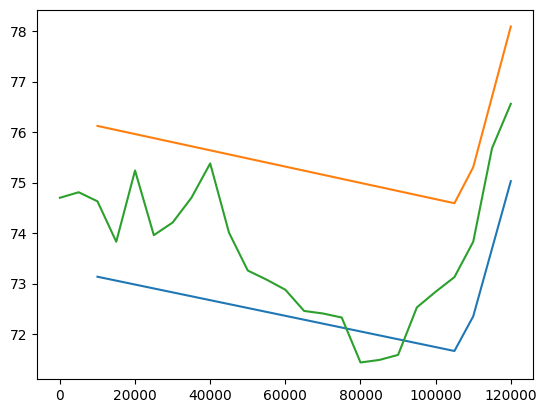

In [41]:
axes = plt.subplot() # Creates the Axis.

axes.plot(quote_dates, bid_data) # Plot the X and Y axis using the quote_dates and bid_data.

# Plot the refData and offerData next
# Insert your answer code here
axes.plot(quote_dates,offer_data)
axes.plot(ref_dates,ref_data)


##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [ ]:
# GRADING CELL

![](https://algo-assets.amplifyme.com/quant/challenge2.png)

# Quant Simulation Challenge 2 - Skewed Price Making

In this challenge you must work independently to complete several functions which will now skew your prices based on the position of risk at any given moment of time. This will help show you how to optimize the code.

The goal of this challenge is to automate the market-making process, using object-orientated programming to automatically create a bid-offer spread around the reference price. 

You're expected to provide a 2% non-skewed bid and offer for each trade with no risk.

You're expected to provide a 1% non-skewed bid or offer and a 7% skewed bid or offer depending on your risk.

Good luck!

In [ ]:
VimeoVideo('744735162?h=5b1f522aa1')

In [ ]:
mm = MarketMaker.mm()


### a) Using the code learned in challenge 1 apply an algorithm to all price requests and skew based on risk.


The functions below have been created in 2 steps to allow you to manage the trade process faster.


#### Remember to log any *quoted_trades* and *completed_trades* to your MM object or risk penalties for poor risk management.

#### Function 1 - `def calculate_spread(price):` 
This first function has been mostly done for you, just calculate the bid and offer price. For this function, the *balance* is accessed to determine the firm's risk at any given moment. This information is then used to decide if you're Axed Long, Axed Short or Neutral in your position. This is then reflected in your **bid** and **offer** prices.

In [ ]:
# Replace the ? in this task with your answer.

def calculate_spread(quote):
    volume = mm.current_positions[quote[0][0]].position_volume
    if volume > 0:
        bid_price = ? # Give the bid spread
        offer_price = ? # Give the offer spread
    # Complete all other scenarios for the volume.
    # Create a QuotedTrade to be returned from this function and log it.
    # Insert your answer code here
    return trade

#### Function 2 - `def handle_response(trade):` 
The **QuotedTrade** object is shown using the HF's function, to get the HF's response. You need to handle this response, in order to create your **CompletedTrade** object correctly. Also, log your CompletedTrade object using: `mm.add_trade(CompletedTrade)` .

In [ ]:
def handle_response(trade):
    # Add the logic here for handling the response action.
    # Create and Store the CompletedTrade into your logs.
    # Insert your answer code here

### Run the cell below to call your functions

In [ ]:
for request in price_requests:
    for price in prices:
        if price[0] == request[0] and price[1] == request[1]:
            quote = calculate_spread( (request, price[2]) )
            response = hf.show(quote)
            trade = handle_response(response)

In [ ]:
# GRADING CELL

### b) Create graphical outputs for all the tickers you quoted_trades

#### Similar to the graph created in Chalenge One however it should be done for all the different tickers dealt for the HF client.

In [ ]:
# Insert your answer code here